In [26]:
import pandas as pd
import os
import requests

BASE_PATH = "/home/david/Downloads/landmark-recognition-2021"

train_df = pd.read_csv(BASE_PATH + "/train.csv")
submission_df = pd.read_csv(BASE_PATH + "/sample_submission.csv")

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
import seaborn as sns

In [7]:
print(train_df.shape)
print(submission_df.shape)

(1580470, 2)
(10345, 2)


In [8]:
print(train_df.head())

                 id  landmark_id
0  17660ef415d37059            1
1  92b6290d571448f6            1
2  cd41bf948edc0340            1
3  fb09f1e98c6d2f70            1
4  25c9dfc7ea69838d            7


In [9]:
print(submission_df.head())

                 id   landmarks
0  00084cdf8f600d00  137790 0.1
1  000b15b043eb8cf0  137790 0.1
2  0011a52f9b948fd2  137790 0.1
3  00141b8a5a729084  137790 0.1
4  0018aa4b92532b77  137790 0.1


In [10]:
def image_grid3x3(image_array, landmarks):
    fig = plt.figure(figsize=(12., 12.))
    grid = ImageGrid(fig, 111,
                     nrows_ncols=(3, 3),
                     axes_pad=1)
    
    for idx, (ax, im) in enumerate(zip(grid, image_array)):
        ax.imshow(im)
        ax.set_title(landmarks[idx])
        ax.set_xlabel(f'{im.shape}')
        
    plt.show()

In [11]:
def make_img_path(img_id):
    return "/".join([char for char in img_id[:3]]) + "/" + img_id + ".jpg"

In [21]:
def get_img_numpy(img_id, base="/train"):
    img_path = make_img_path(img_id)
    print(base + "/" + img_path)
    img = Image.open(base + "/" + img_path)
    return np.asarray(img)

/home/david/Downloads/landmark-recognition-2021/train/d/e/8/de8aea5b2509a9cb.jpg
/home/david/Downloads/landmark-recognition-2021/train/0/8/3/083d66c51b843699.jpg
/home/david/Downloads/landmark-recognition-2021/train/1/4/3/1437a17f7807b1aa.jpg
/home/david/Downloads/landmark-recognition-2021/train/1/e/a/1eabd249a553256b.jpg
/home/david/Downloads/landmark-recognition-2021/train/1/f/5/1f57b35a5f1f2701.jpg
/home/david/Downloads/landmark-recognition-2021/train/2/9/f/29f1cd45da7ba3e9.jpg
/home/david/Downloads/landmark-recognition-2021/train/3/3/6/3361c759a1fca3ae.jpg
/home/david/Downloads/landmark-recognition-2021/train/4/6/1/4617eedec24cc1f3.jpg
/home/david/Downloads/landmark-recognition-2021/train/4/8/7/4871d98dfc997c59.jpg


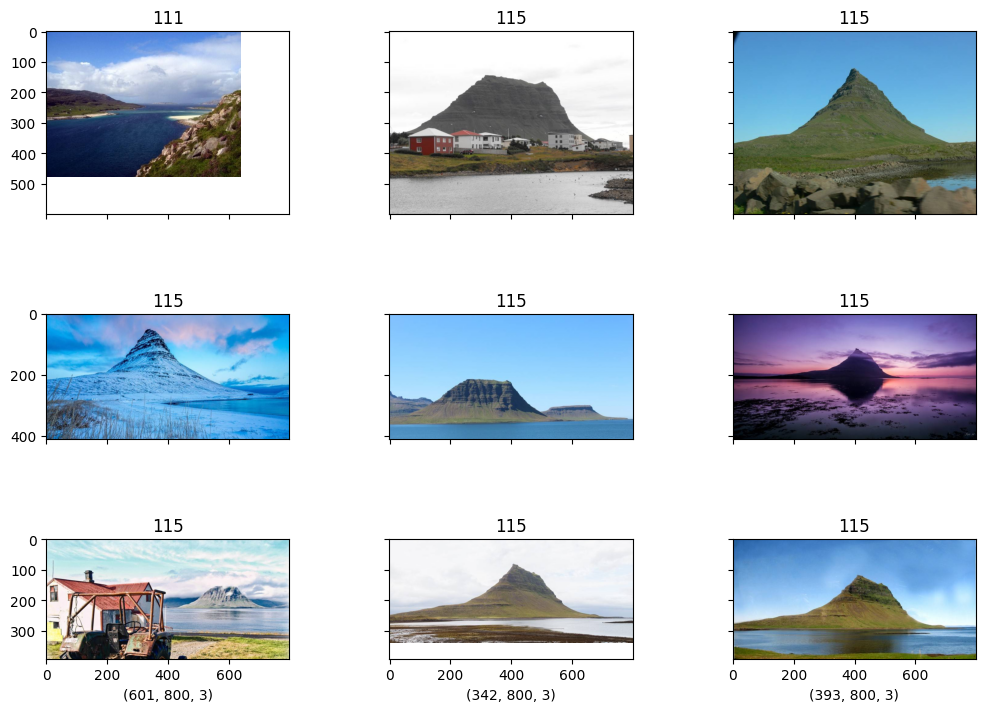

In [23]:
img_array = [get_img_numpy(img, BASE_PATH + "/train") for img in train_df['id'][1000:1009]]

image_grid3x3(img_array, [landmark for landmark in train_df['landmark_id'][1000:1009]])

/home/david/Downloads/landmark-recognition-2021/train/8/b/2/8b23ddb661705113.jpg
/home/david/Downloads/landmark-recognition-2021/train/9/0/3/903fc30c8f64e54a.jpg
/home/david/Downloads/landmark-recognition-2021/train/9/0/8/908bbaeb8b0fa889.jpg
/home/david/Downloads/landmark-recognition-2021/train/9/2/7/92787607a02f838f.jpg
/home/david/Downloads/landmark-recognition-2021/train/9/5/8/9586486b0fcd7e01.jpg
/home/david/Downloads/landmark-recognition-2021/train/9/c/1/9c1bbbcf25812ba3.jpg
/home/david/Downloads/landmark-recognition-2021/train/9/d/a/9da3cbf6d8b52854.jpg
/home/david/Downloads/landmark-recognition-2021/train/a/2/1/a213a63899e5388f.jpg
/home/david/Downloads/landmark-recognition-2021/train/a/2/f/a2f1fa237f7a14da.jpg


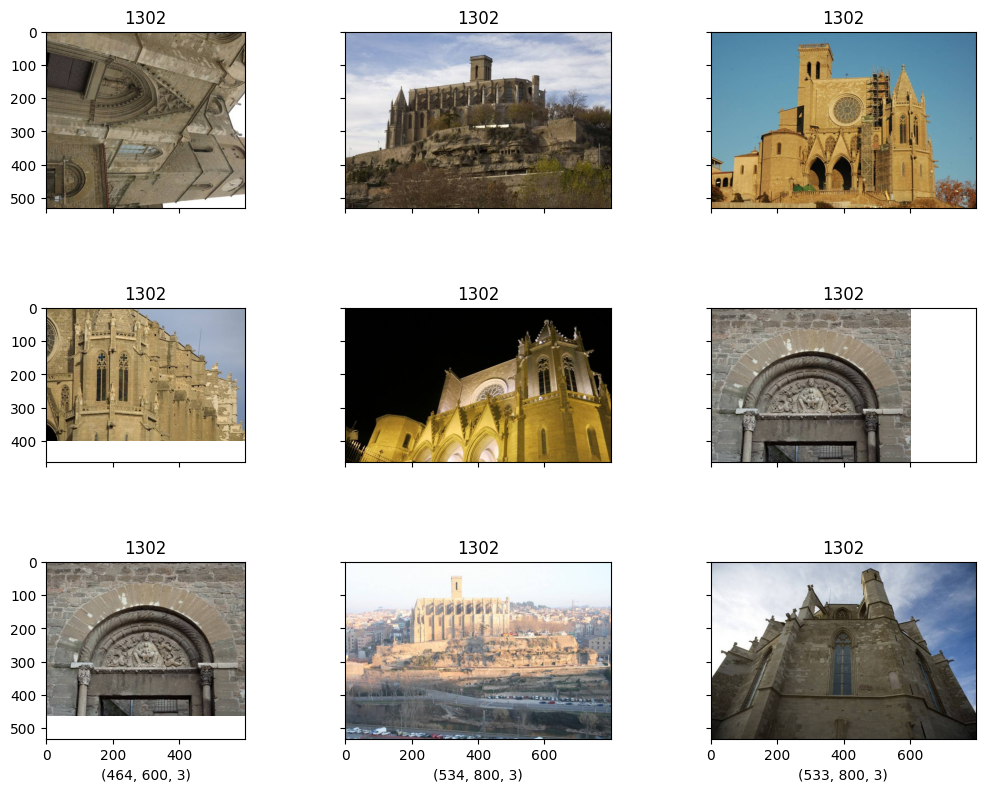

In [24]:
img_array = [get_img_numpy(img, BASE_PATH + "/train") for img in train_df['id'][10000:10009]]

image_grid3x3(img_array, [landmark for landmark in train_df['landmark_id'][10000:10009]])

<Axes: xlabel='landmark_id', ylabel='Count'>

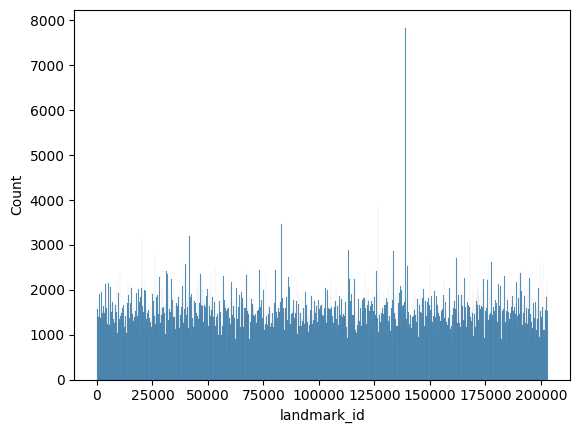

In [25]:
sns.histplot(data=train_df, x="landmark_id", bins=1000)

In [27]:

def fetch_landmarks_by_country(country_code):
    country_url = f"https://storage.googleapis.com/gld-v2/data/train/country/{country_code}.json"
    response = requests.get(country_url)
    if response.status_code != 200:
        raise Exception(f"Failed to fetch data for country {country_code}")
    
    landmarks = response.json()
    return landmarks

def fetch_images_by_landmark(landmark_id):
    landmark_url = f"https://storage.googleapis.com/gld-v2/data/train/landmarks/{landmark_id}.json"
    response = requests.get(landmark_url)
    if response.status_code != 200:
        raise Exception(f"Failed to fetch images for landmark {landmark_id}")
    
    images_data = response.json()
    return images_data['images']

def main(country_code):
    landmarks = fetch_landmarks_by_country(country_code)
    
    result = []
    for landmark in landmarks:
        landmark_id = landmark['id']
        landmark_name = landmark['name']
        images = fetch_images_by_landmark(landmark_id)
        image_urls = [image['url'] for image in images]
        
        result.append({
            'id': landmark_id,
            'name': landmark_name,
            'images': image_urls
        })
    
    return result

# # Example usage:
# country_code = 'BG'
# landmark_data = main(country_code)
# for data in landmark_data:
#     print(f"Landmark ID: {data['id']}, Name: {data['name']}, Images: {data['images']}")


In [28]:
country_code = 'BG'

In [29]:
landmarks = fetch_landmarks_by_country(country_code)

In [31]:
len(landmarks)

658

In [ ]:
landmark_data = main(country_code)
for data in landmark_data:
    print(f"Landmark ID: {data['id']}, Name: {data['name']}, Images: {data['images']}")

In [33]:
len(landmark_data)

658

In [34]:
landmark_data[0]

{'id': 20298,
 'name': 'Church_of_the_Holy_Saviour,_Nesebar',
 'images': ['https://upload.wikimedia.org/wikipedia/commons/6/60/Church_of_the_Holy_Saviour%2C_Nesebar%2C_June_2018_01.jpg',
  'http://upload.wikimedia.org/wikipedia/commons/9/93/Church_of_the_Holy_Saviour%2C_Nesebar.JPG',
  'https://upload.wikimedia.org/wikipedia/commons/6/6c/Wedding_memory_%28Bulgaria%29_14.jpg',
  'https://upload.wikimedia.org/wikipedia/commons/9/9a/Church_of_the_Holy_Saviour%2C_Nesebar%2C_June_2018_02.jpg',
  'https://upload.wikimedia.org/wikipedia/commons/3/37/%D0%9D%D0%B5%D1%81%D0%B5%D0%B1%D1%8B%D1%80_%D0%A6%D0%B5%D1%80%D0%BA%D0%BE%D0%B2%D1%8C_%D0%A1%D0%B2_%D0%A1%D0%BF%D0%B0%D1%81%D0%B0.jpg',
  'https://upload.wikimedia.org/wikipedia/commons/f/f5/Church_of_the_Holy_Saviour%2C_Nesebar_01.JPG',
  'https://upload.wikimedia.org/wikipedia/commons/d/da/St_Spas%2C_Nesebar.jpg',
  'https://upload.wikimedia.org/wikipedia/commons/f/fe/Church_of_the_Holy_Saviour%2C_Nesebar_02.JPG']}

In [83]:
def extract_image_ids(landmark_data):
    image_ids = []
    for data in landmark_data:
        image_ids.extend(data['images'])
    return image_ids

def extract_landark_ids_list(landmark_data):
    landmark_ids = []
    for data in landmark_data:
        landmark_ids.append(data['id'])
    return landmark_ids

In [97]:
bg_landmarks_ids = extract_landark_ids_list(landmark_data)

In [36]:
bg_image_ids = extract_image_ids(landmark_data)

In [86]:
len(bg_landmarks_ids)

658

In [52]:
bg_image_ids[0:10]

['https://upload.wikimedia.org/wikipedia/commons/6/60/Church_of_the_Holy_Saviour%2C_Nesebar%2C_June_2018_01.jpg',
 'http://upload.wikimedia.org/wikipedia/commons/9/93/Church_of_the_Holy_Saviour%2C_Nesebar.JPG',
 'https://upload.wikimedia.org/wikipedia/commons/6/6c/Wedding_memory_%28Bulgaria%29_14.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/9/9a/Church_of_the_Holy_Saviour%2C_Nesebar%2C_June_2018_02.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/3/37/%D0%9D%D0%B5%D1%81%D0%B5%D0%B1%D1%8B%D1%80_%D0%A6%D0%B5%D1%80%D0%BA%D0%BE%D0%B2%D1%8C_%D0%A1%D0%B2_%D0%A1%D0%BF%D0%B0%D1%81%D0%B0.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/f/f5/Church_of_the_Holy_Saviour%2C_Nesebar_01.JPG',
 'https://upload.wikimedia.org/wikipedia/commons/d/da/St_Spas%2C_Nesebar.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/f/fe/Church_of_the_Holy_Saviour%2C_Nesebar_02.JPG',
 'http://upload.wikimedia.org/wikipedia/commons/1/13/Ruse_TodorBozhinov_HDR_%285%29.jpg',
 'http://upload.wikim

In [42]:

def read_csv_to_dict(csv_file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file_path)
    
    # Convert the DataFrame to a dictionary
    landmark_dict = df.set_index('landmark_id')['category'].to_dict()
    
    return landmark_dict

# Example usage:
csv_file_path = BASE_PATH + '/train_label_to_category.csv'  # Replace with the path to your CSV file
landmark_id_to_wikimedia = read_csv_to_dict(csv_file_path)

# Print the resulting dictionary
print(len(landmark_id_to_wikimedia))


203094


In [46]:
list(landmark_id_to_wikimedia.items())[:5]

[(0, 'http://commons.wikimedia.org/wiki/Category:Happy_Valley_Racecourse'),
 (1, 'http://commons.wikimedia.org/wiki/Category:Luitpoldpark_in_Munich'),
 (2, 'http://commons.wikimedia.org/wiki/Category:Grand_Ventron'),
 (3,
  'http://commons.wikimedia.org/wiki/Category:Tweed_Heads,_New_South_Wales'),
 (4,
  'http://commons.wikimedia.org/wiki/Category:Santa_Maria_Immacolata_della_Concezione_(Rome)')]

In [50]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [286]:
print(torch.version.cuda)
print("cuda available: " + str(torch.cuda.is_available()))

if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')
device

12.1
cuda available: True


device(type='cuda')

In [109]:
wikimedia_to_landmark_id = {v: k for k, v in landmark_id_to_wikimedia.items()}

In [75]:
list(wikimedia_to_landmark_id.items())[:5]

[('http://commons.wikimedia.org/wiki/Category:Happy_Valley_Racecourse', 0),
 ('http://commons.wikimedia.org/wiki/Category:Luitpoldpark_in_Munich', 1),
 ('http://commons.wikimedia.org/wiki/Category:Grand_Ventron', 2),
 ('http://commons.wikimedia.org/wiki/Category:Tweed_Heads,_New_South_Wales',
  3),
 ('http://commons.wikimedia.org/wiki/Category:Santa_Maria_Immacolata_della_Concezione_(Rome)',
  4)]

In [54]:
train_df

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7
...,...,...
1580465,72c3b1c367e3d559,203092
1580466,7a6a2d9ea92684a6,203092
1580467,9401fad4c497e1f9,203092
1580468,aacc960c9a228b5f,203092


In [61]:
lid = train_df.iloc[0]['landmark_id']

In [62]:
lid


np.int64(1)

In [64]:
landmark_id_to_wikimedia[lid] in bg_image_ids

False

In [88]:
is_in_bg_image_ids(lid)

False

In [73]:
train_df.head(10)

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7
5,28b13f94a6f1f3c1,7
6,307d6584f473ba35,7
7,4a7ba9eb16d51bc4,7
8,597353dfbb3df649,7
9,a40d00dc4fcc3a10,7


In [100]:
bg_image_ids[0:10]

['https://upload.wikimedia.org/wikipedia/commons/6/60/Church_of_the_Holy_Saviour%2C_Nesebar%2C_June_2018_01.jpg',
 'http://upload.wikimedia.org/wikipedia/commons/9/93/Church_of_the_Holy_Saviour%2C_Nesebar.JPG',
 'https://upload.wikimedia.org/wikipedia/commons/6/6c/Wedding_memory_%28Bulgaria%29_14.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/9/9a/Church_of_the_Holy_Saviour%2C_Nesebar%2C_June_2018_02.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/3/37/%D0%9D%D0%B5%D1%81%D0%B5%D0%B1%D1%8B%D1%80_%D0%A6%D0%B5%D1%80%D0%BA%D0%BE%D0%B2%D1%8C_%D0%A1%D0%B2_%D0%A1%D0%BF%D0%B0%D1%81%D0%B0.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/f/f5/Church_of_the_Holy_Saviour%2C_Nesebar_01.JPG',
 'https://upload.wikimedia.org/wikipedia/commons/d/da/St_Spas%2C_Nesebar.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/f/fe/Church_of_the_Holy_Saviour%2C_Nesebar_02.JPG',
 'http://upload.wikimedia.org/wikipedia/commons/1/13/Ruse_TodorBozhinov_HDR_%285%29.jpg',
 'http://upload.wikim

In [92]:
landmark_id_to_wikimedia[481]

'http://commons.wikimedia.org/wiki/Category:Bayrakli_Mosque,_Samokov'

In [93]:
len(bg_image_ids)

21452

In [194]:
bg_landmarks_ids[0:10]

[20298, 19441, 19459, 19047, 19053, 21888, 21874, 21235, 21536, 21153]

In [99]:
len(bg_landmarks_ids)

658

In [188]:
# Serialize bg_landmarks_id
bg_landmarks_df = pd.DataFrame(bg_landmarks_ids, columns=['landmark_id'])
bg_landmarks_df.to_csv("bg_landmarks_ids.csv", sep='\t')

In [104]:
# Function to check if landmark_id maps to a bg_image_id
def is_in_bg_image_ids(landmark_id, bg_landmarks_ids):
    return landmark_id in bg_landmarks_ids

In [106]:
is_in_bg_image_ids(20298,bg_landmarks_ids)

True

In [288]:
class CustomCountryDataset(Dataset):
    def __init__(self, photo_label_df, path, transform):
        self.photo_label_df = photo_label_df
        self.path = path
        self.transform = transform
        
    def __len__(self):
        return len(self.photo_label_df)
    
    def __getitem__(self, index):
        row = bg_train_df.iloc[0]
        image_id = row['id']
        landmark_id = row['landmark_id']
        file = image_id + '.jpg'
        subpath = '/'.join([char for char in image_id[0:3]])

        image = PIL.Image.open(self.path + '/' + subpath + '/' + file)
        X = self.transform(image)
        y = torch.tensor(landmark_id, dtype=torch.int32)
        
        return X, y

In [116]:
bg_train_df = train_df[train_df['landmark_id'].apply(lambda lid: is_in_bg_image_ids(lid, bg_landmarks_ids))]

In [261]:
image_id = bg_train_df.iloc[0]['id']
file = image_id + '.jpg'
subpath = '/'.join([char for char in image_id[0:3]])
fullPath = BASE_PATH + '/train' + '/' + subpath + '/' + file
image = PIL.Image.open(fullPath)
image = transform_to_128(image)
image

tensor([[[0.5922, 0.5922, 0.5882,  ..., 0.5725, 0.5725, 0.5725],
         [0.5922, 0.5922, 0.5882,  ..., 0.5725, 0.5725, 0.5725],
         [0.5961, 0.5961, 0.5922,  ..., 0.5804, 0.5804, 0.5804],
         ...,
         [0.4824, 0.4824, 0.4824,  ..., 0.3804, 0.4118, 0.4118],
         [0.4863, 0.4824, 0.4863,  ..., 0.3843, 0.4118, 0.4118],
         [0.4824, 0.4745, 0.4745,  ..., 0.3765, 0.4039, 0.3843]],

        [[0.7686, 0.7686, 0.7647,  ..., 0.7373, 0.7333, 0.7373],
         [0.7686, 0.7686, 0.7647,  ..., 0.7373, 0.7333, 0.7373],
         [0.7686, 0.7686, 0.7647,  ..., 0.7451, 0.7412, 0.7412],
         ...,
         [0.4706, 0.4706, 0.4706,  ..., 0.3725, 0.4039, 0.4000],
         [0.4745, 0.4706, 0.4745,  ..., 0.3686, 0.3961, 0.3961],
         [0.4706, 0.4627, 0.4627,  ..., 0.3608, 0.3882, 0.3686]],

        [[0.9922, 0.9922, 0.9882,  ..., 0.9725, 0.9765, 0.9647],
         [0.9922, 0.9922, 0.9882,  ..., 0.9725, 0.9765, 0.9765],
         [0.9882, 0.9882, 0.9843,  ..., 0.9765, 0.9765, 0.

In [214]:
bg_train_df.iloc[0]['landmark_id']

np.int64(481)

In [202]:
len(bg_train_df)

9418

In [232]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(bg_train_df, test_size=0.1, random_state=42)
len(train_df), len(val_df)

(8476, 942)

In [233]:
train_df

,id,landmark_id
690104,e3863554281b5180,88483
1052611,b858c5811bf6d4d1,135891
430853,23c8a4dc1adda9ea,54373
274580,124a142a1dfcc696,35005
1501256,f60ec48f0f5efc70,192720
...,...,...
788725,06ab82130f89b024,101924
690082,d55841fd30d2a7e6,88483
746193,846830ebf5fb50bc,96275
74586,d55e4a70814cd8f7,9673


In [222]:
transform_to_128 = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

In [289]:
train_dataset = CustomCountryDataset(
    photo_label_df=train_df,
    path=BASE_PATH + '/train',
    transform=transform_to_128,
)

val_dataset = CustomCountryDataset(
    photo_label_df=val_df,
    path=BASE_PATH + '/train',
    transform=transform_to_128,
)

In [240]:
len(train_dataset)

8476

In [141]:
import cv2
import PIL.Image

In [310]:
train_dataset[0][0].shape

torch.Size([3, 128, 128])

In [268]:
batch_size = 64

In [320]:
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
)

val_dataloader = DataLoader(
    dataset=val_dataset,
    batch_size=batch_size,
    shuffle=True,
)

In [292]:
device

device(type='cuda')

In [271]:
def train(model, 
          train_data_loader, 
          validation_data_loader, 
          optimizer, 
          criterion, 
          epochs, 
          device):
    train_losses, val_losses = [], []


    for epoch in range(epochs):

        model.train()
        running_loss = 0.0
        for images, labels in tqdm(train_data_loader, desc='Training loop'):
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)
    
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * labels.size(0)
        train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(train_loss)
    
        # Validation phase
        model.eval()
        running_loss = 0.0
        with torch.no_grad():
            for images, labels in tqdm(validation_data_loader, desc='Validation loop'):
                # Move inputs and labels to the device
                images, labels = images.to(device), labels.to(device)
    
                outputs = model(images)
                loss = criterion(outputs, labels)
                running_loss += loss.item() * labels.size(0)
        valid_loss = running_loss / len(valid_loader.dataset)
        val_losses.append(valid_loss)
        print(f"Epoch {epoch+1}/{epochs} - Train loss: {train_loss}, Validation loss: {valid_loss}")

    return train_losses, val_losses

In [272]:
def plot_losses(train_losses, val_losses):
    plt.plot(train_losses, label='Training loss')
    plt.plot(val_losses, label='Validation loss')
    plt.legend()
    plt.title("Loss over epochs")
    plt.show()

In [273]:
def accuracy(model, data_loader, device):

    model.eval()
    total_correct = 0
    total_samples = 0

    for images, labels in data_loader:
       
        images = images.to(device)
        labels = labels.to(device)

        
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    
    accuracy = 100 * total_correct / total_samples
    print(f' Accuracy = {accuracy:.2f}%')

In [324]:
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from tqdm.notebook import tqdm

class PretrainedClassifier(nn.Module):
    def __init__(self, pretrained_model, out_size, num_classes=53):
        super(PretrainedClassifier, self).__init__()
        self.base_model = timm.create_model(pretrained_model, pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        #making a classfier
        self.classifier = nn.Linear(out_size, num_classes)

    def forward(self, x):
        x = self.features(x)
        output = self.classifier(x)
        return output

In [278]:
import timm

/home/david/Repos/FMI/Google-Landmark-Recognition-2021/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [297]:
unique_classes = len(bg_train_df['landmark_id'].unique())
unique_classes

339

In [299]:
efficient_net = PretrainedClassifier(num_classes=339,pretrained_model='efficientnet_b0',out_size=1280)

In [298]:

print(torch.cuda.is_available())  # Should return True
print(torch.cuda.device_count())  # Should return the number of available GPUs
print(torch.cuda.current_device())  # Should return the current device index
print(torch.cuda.get_device_name(torch.cuda.current_device()))  # Should return the device name


True
1
0
NVIDIA GeForce RTX 3060 Laptop GPU


In [304]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
device

device(type='cpu')

In [314]:
efficient_net = efficient_net.to(device)

In [306]:
#loss function
criterion = nn.CrossEntropyLoss()

In [308]:
#optimizer
optimizer = optim.Adam(efficient_net.parameters(), lr=0.001)

In [316]:
next(efficient_net.parameters()).device 

device(type='cpu')

In [ ]:
summary(efficient_net.to(device), (3, 128, 128))

In [318]:
print(str(efficient_net)[:500])

PretrainedClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=Fa


In [327]:
!jupyter nbextension enable --py widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [331]:
train_losses, val_losses = train(efficient_net, train_dataloader, val_dataloader, optimizer, criterion, 5, device)

Exception ignored in: <function tqdm.__del__ at 0x732a9d9ed940>
Traceback (most recent call last):
  File "/home/david/Repos/FMI/Google-Landmark-Recognition-2021/.venv/lib/python3.12/site-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/home/david/Repos/FMI/Google-Landmark-Recognition-2021/.venv/lib/python3.12/site-packages/tqdm/notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [329]:
!jupyter labextension list

JupyterLab v4.2.2
/home/david/Repos/FMI/Google-Landmark-Recognition-2021/.venv/share/jupyter/labextensions
        jupyterlab_pygments v0.3.0 enabled OK (python, jupyterlab_pygments)
        @jupyter-widgets/jupyterlab-manager v5.0.11 enabled OK (python, jupyterlab_widgets)



In [330]:
!jupyter labextension

Please supply at least one subcommand: build, check, develop, disable, enable, install, link, list, lock, uninstall, unlink, unlock, update, watch
